# Forward Modeling Using Resipy

##Notebook Setup

In [ ]:
!pip install resipy #installs the resipy package to our runtime; only needed in colab (as long as resipy is installed in your environment)
!sudo apt install wine-stable #only needed for unix/linux machines, which is what colab is running on
#We will use matplotlib inline in the jupyter notebook
%matplotlib inline  


In [1]:

import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append((os.path.relpath('../src'))) # add here the relative path of the API folder
import matplotlib.pyplot as plt
import pandas as pd

#from google.colab import files #For downloading
import ipywidgets

import numpy as np # numpy for electrode generation
from resipy import Project


#This adjusts the plot sizes and settings in the notebook
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

API path =  /home/codespace/.python/current/lib/python3.12/site-packages/resipy
ResIPy version =  3.6.1
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


Change the values in the next cell if you need to adjust the size of your output plots.

In [2]:
plt.rcParams["figure.figsize"] = (25,8) #Adjust these values to adjust plot sizes. (1st value is horizontal/width, 2nd is vertical/height)

## Create ResiPy Project

Also, start again at this cell to reset your project if you keep running into errors

In [3]:
k = Project(typ='R2') # create R2 object

Working directory is: /home/codespace/.python/current/lib/python3.12/site-packages/resipy
clearing dirname


## Input Electrode and Profile Geometry Information

Run cell and follow instructions to input data.

***Set electrode spacing of 2 (meters) and 64 electrodes.***

In [4]:
electrodeSpacing = 
numberOfElectrodes =


def generateSurfaceElectrodes(resipy_project, electrode_spacing, number_of_electrodes):
  elecDF = pd.DataFrame()

  elec = np.zeros((number_of_electrodes,3))

  elec[:,0] = np.arange(0, number_of_electrodes*electrode_spacing, electrode_spacing)

  elecDF = pd.DataFrame(elec)
  elecDF.columns = ['x','y','z']
  elecDF['remote'] = False
  elecDF['buried'] = False
  elecDF['label'] = elecDF.index.values+1

  resipy_project.setElec(elecDF)
  
  return elecDF
  
generateSurfaceElectrodes(resipy_project=k, electrode_spacing=electrodeSpacing, number_of_electrodes=numberOfElectrodes)
k.elec

,x,y,z,remote,buried,label
0,0.0,0.0,0.0,False,False,1
1,2.0,0.0,0.0,False,False,2
2,4.0,0.0,0.0,False,False,3
3,6.0,0.0,0.0,False,False,4
4,8.0,0.0,0.0,False,False,5
...,...,...,...,...,...,...
59,118.0,0.0,0.0,False,False,60
60,120.0,0.0,0.0,False,False,61
61,122.0,0.0,0.0,False,False,62
62,124.0,0.0,0.0,False,False,63


# Q1: What is the physical length of the simulated profile in the x-direction that we created above(please include units)?

-----

## Input Background Resistivity Value of Subsurface

Run the cell below and follow the prompts to create a mesh with a background resistivity of 75 ohm-m

Creating triangular mesh...done (4540 elements)


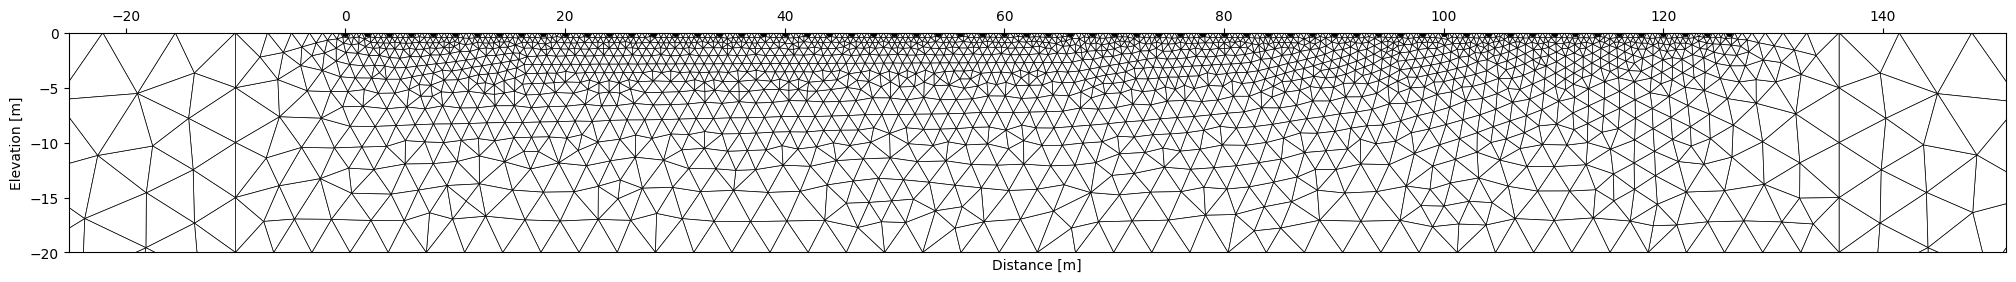

In [14]:
backgroundResistivity = 110

k.createMesh(typ='trian', cl_factor = 10, res0=backgroundResistivity) # let's create the mesh based on these electrodes position
k.showMesh()

Typical resistivities of geologic materials

<img src="./resistivity-graph.jpg" alt="Typical Resistivities of Geologic Materials" />

# Q2: Given the background resistivity value you entered and the provided chart, would you expect the subsurface here to be clayey sediment or sandy sediment?

> Note: Use the chart above for your answer to Q2, but note that these values will vary between regions

---

## Input Geometry of Subsurface Target or Layer

Run the cells below and follow the prompts to create an object with the following characteristics:


* The top of the object is 5 meters below the surface
* The bottom of the object is 15 meters below the surface
* Object goes from 60 to 70 meters x-distance
* Resistivity of object is 5 ohm-m

This step addes to the current mesh in your project, so you may need to run the cell(s) above to reset your mesh if you only want a single region.

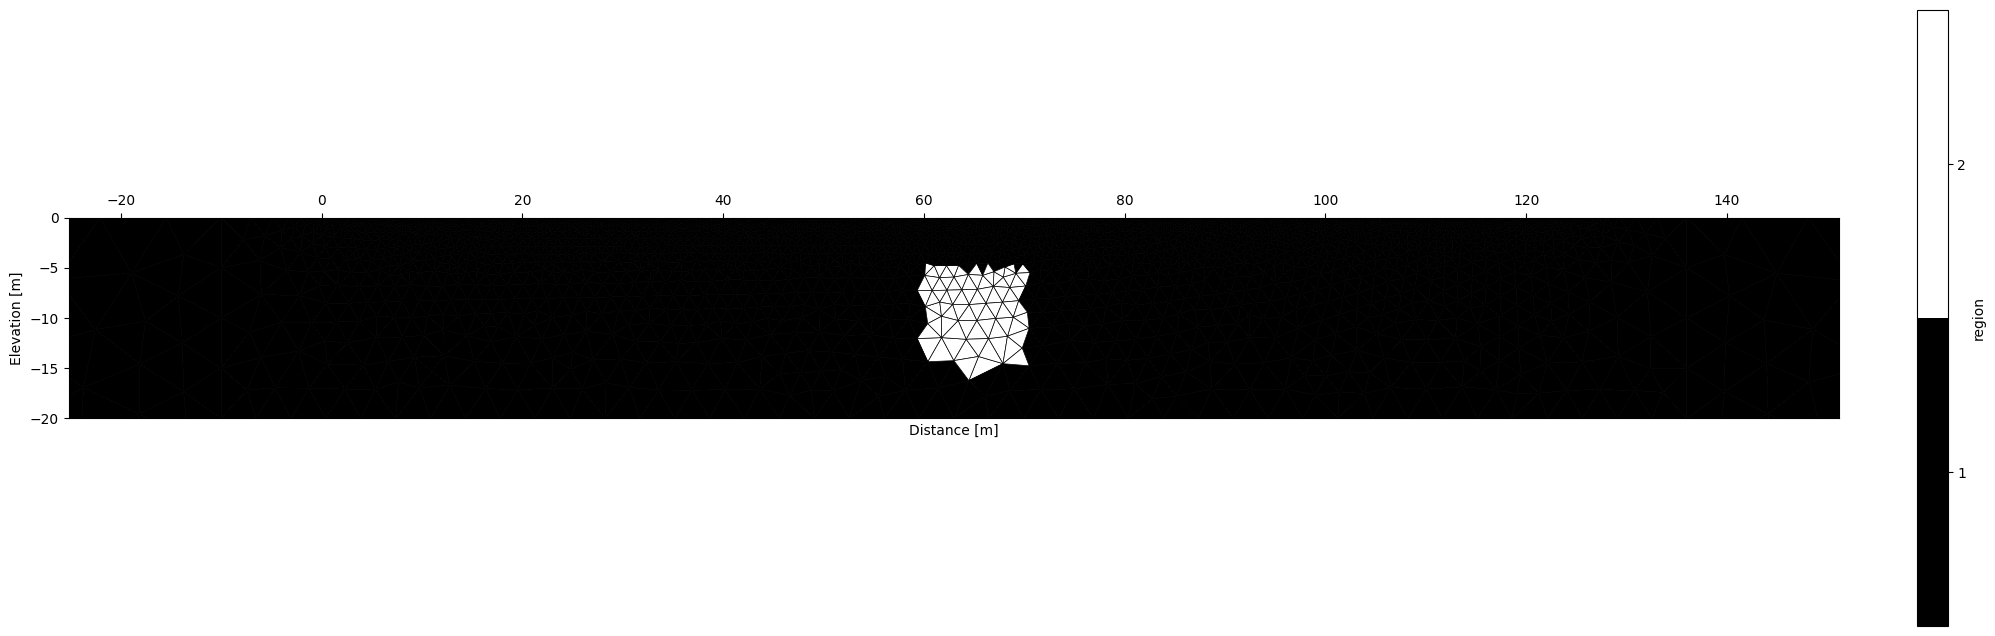

In [15]:
# Depths should be negative numbers
topDepthofObject = -5
bottomDepthofObject =  -15

# Locations in meters (positive values)
leftSideOfObject = 60
rightSideofObject = 70

targetResistivity = 5

k.addRegion(np.array([[leftSideOfObject,topDepthofObject],[rightSideofObject,topDepthofObject],[rightSideofObject,bottomDepthofObject],[leftSideOfObject,bottomDepthofObject],[leftSideOfObject,topDepthofObject]]), targetResistivity)
k.showMesh()

## Choose the type of ERT array we will simulate and the expected errors

Run the cell below and follow the prompts to input a measurement error of 10% and set the ERTArray variable equal to 'schlum2' (a type of Schlumberger array).

The available arrays are:
| "Friendly" Name | Name in Resipy|
|-----------------|---------------|
| 'Dipole-Dipole1'| 'dpdp1'     |
| 'Dipole-Dipole2'| 'dpdp2'     |
| 'Wenner (alpha)'|'wenner_alpha'|
| 'Wenner (beta)' |'wenner_beta'|
| 'Wenner (gamma)'|'wenner_gamma'|
|'Schlumberger 1' |'schlum1'|
|'Schlumberger2'  |'schlum2'|
|'Multi-Gradient' |'multigrad'|
|'Custom Sequence'|'custSeq'|


In [16]:
#Percentage, between 0 and 1
measrument_error_pct = 0.1
ERTArray = 'schlum2'

Run the cell below and set the dataLevels variable equal to ***50***

In [18]:
dataLevels = 50

generateSurfaceElectrodes(k, electrodeSpacing, numberOfElectrodes)
k.createMesh(typ='trian', cl_factor = 10, res0=backgroundResistivity) # let's create the mesh based on these electrodes position
k.addRegion(np.array([[leftSideOfObject,topDepthofObject],[rightSideofObject,topDepthofObject],[rightSideofObject,bottomDepthofObject],[leftSideOfObject,bottomDepthofObject],[leftSideOfObject,topDepthofObject]]), targetResistivity)

if ERTArray in ['dpdp1', 'dpdp2', 'schlum1','schlum2']:
  k.createSequence([(ERTArray, 1, dataLevels)])
else:
  wennerList = []
  for w in range(1,dataLevels):
    wennerList.append((ERTArray,w))
  k.createSequence(wennerList)

Creating triangular mesh...done (4540 elements)
961 quadrupoles generated.


Writing .in file and mesh.dat... done
Writing protocol.dat... done
Running forward model... 

 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 19 - 03 - 2025
 >> My beautiful survey                                                             
 >> F o r w a r d   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from resistivity.dat               

 Measurements read:   961     Measurements rejected:     0

 >> Total Memory required is:          0.002 Gb


All ok
/home/codespace/.python/current/lib/python3.12/site-packages/numpy/lib/function_base.py:2458: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = asanyarray(outputs, dtype=otypes[0])


filterData: 0 / 961 quadrupoles removed.
0/961 reciprocal measurements found.
Forward modelling done.

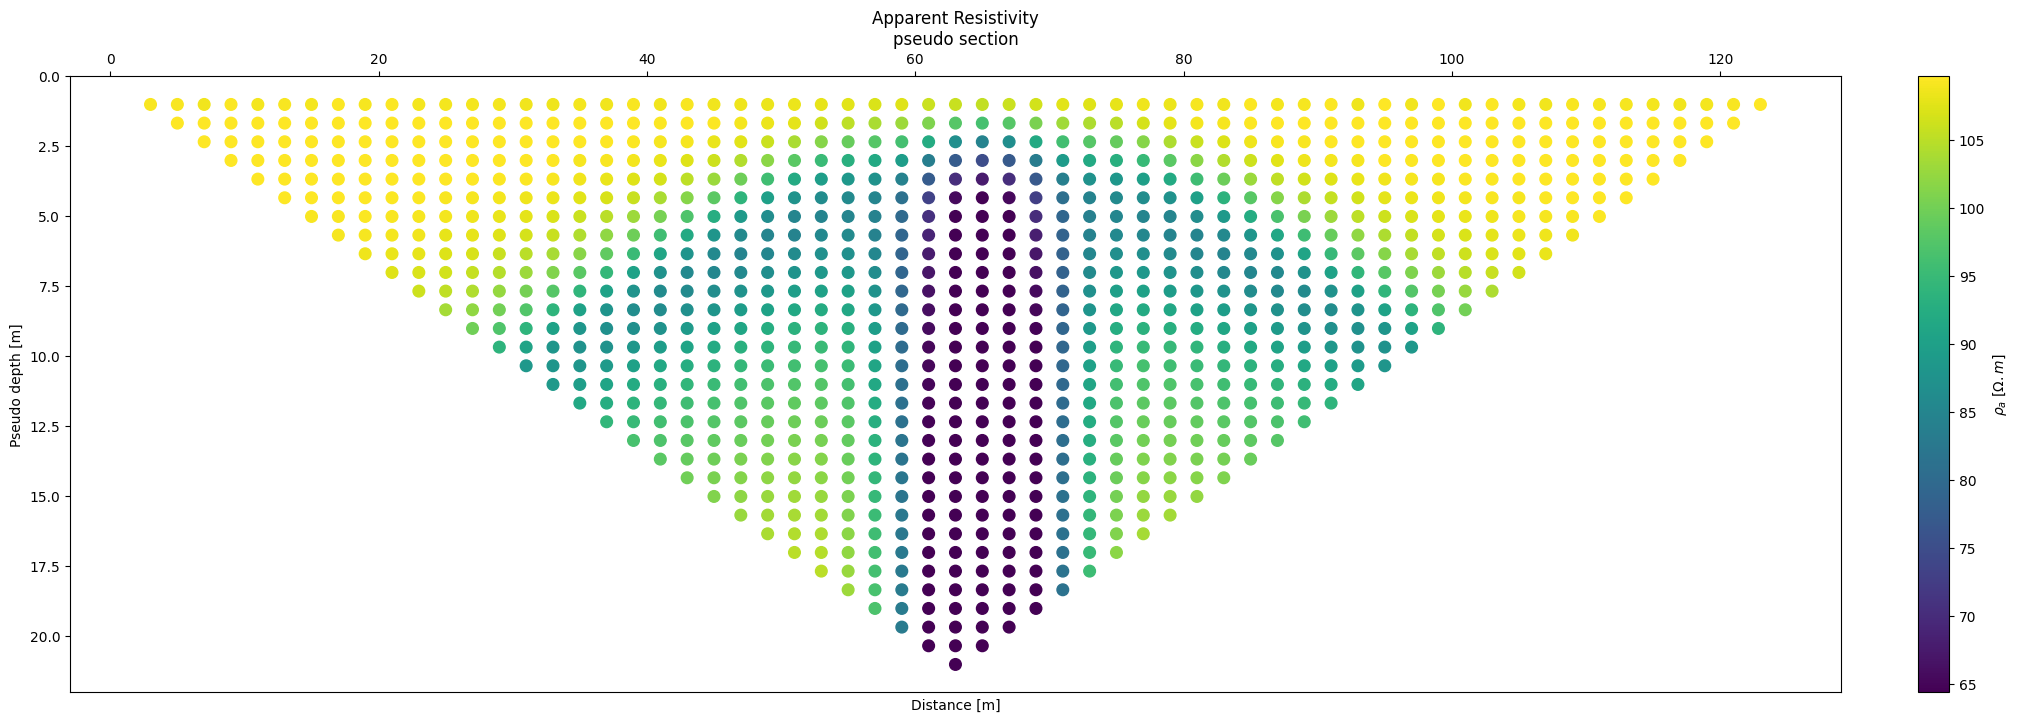

In [19]:
k.forward(noise=measrument_error_pct, iplot=True) 

# Q3: Include a copy of this initial apparent resistivity pseudosection plot. (This should look like a plot with colored points)

---

## Run an inversion on the pseudosection generated from our forward model

In [20]:
k.invert()

Writing .in file and protocol.dat... All non fixed parameters reset to 100 Ohm.m and 0 mrad, as the survey to be inverted is from a forward model.
done

--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 19 - 03 - 2025
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:   961     Measurements rejected:     0
   Geometric mean of apparent r

All ok


# Q4: After running your initial inversion, what is the final RMS misfit (the last value in the output table)? Since the data we read in for the inversion was derived from a forward model, would you expect the value to be zero? Explain why or why not.

---

## Modeling results

This first chart shows the original model we created, color-coded now by resistivity

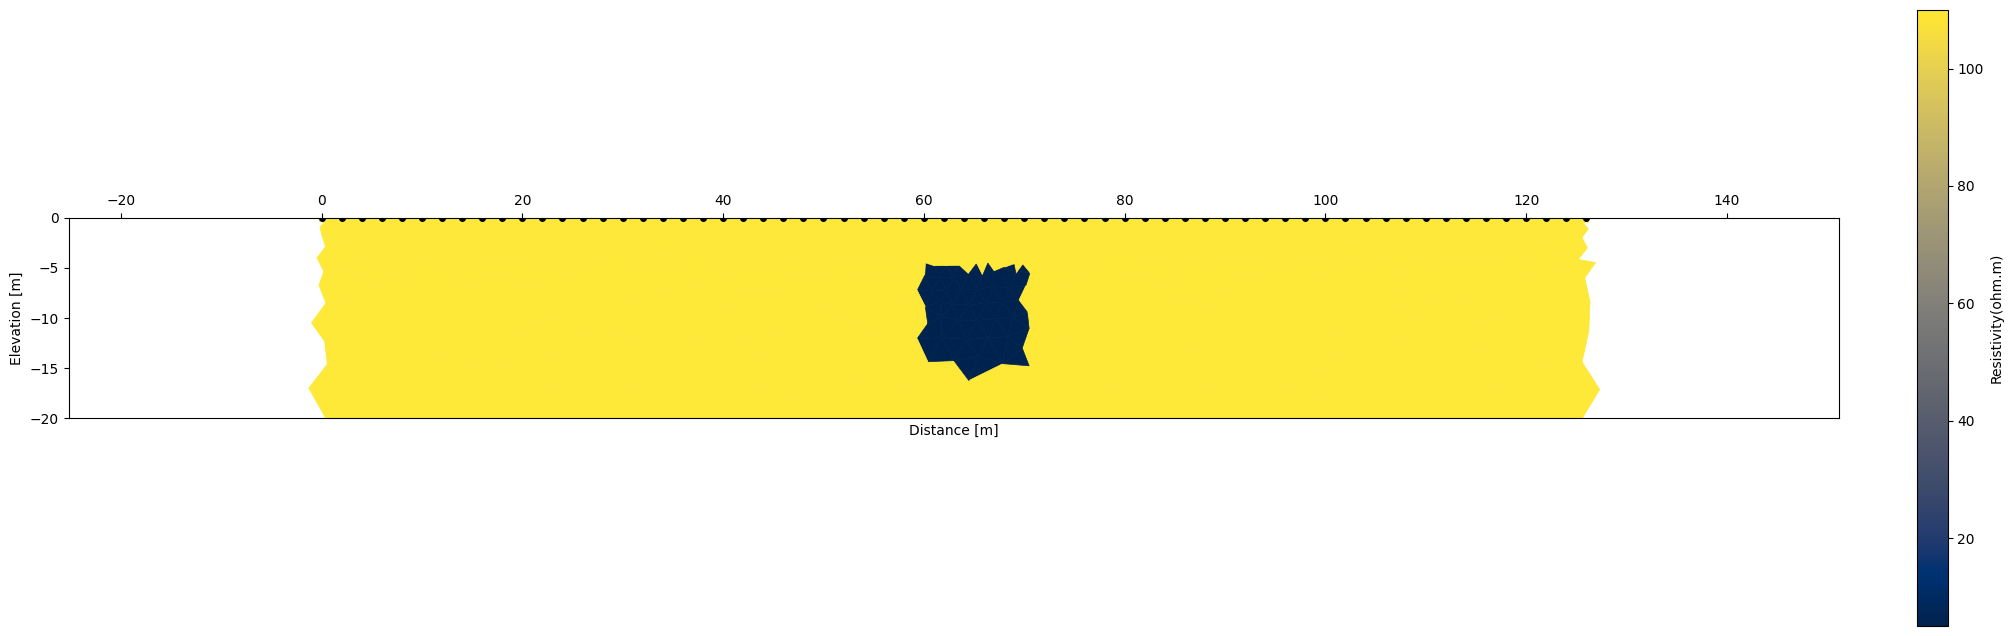

In [21]:
k.showResults(index=0, attr='Resistivity(ohm.m)', color_map='cividis', sens=False, contour=False, clipCorners=False)

This second chart shows the results of our inversion on the pseudosection calculated using our forward model. 

/home/codespace/.python/current/lib/python3.12/site-packages/resipy/meshTools.py:1480: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for col in cont.collections:
/home/codespace/.python/current/lib/python3.12/site-packages/resipy/Project.py:4812: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  colls = mesh.cax.collections if contour == True else [mesh.cax]


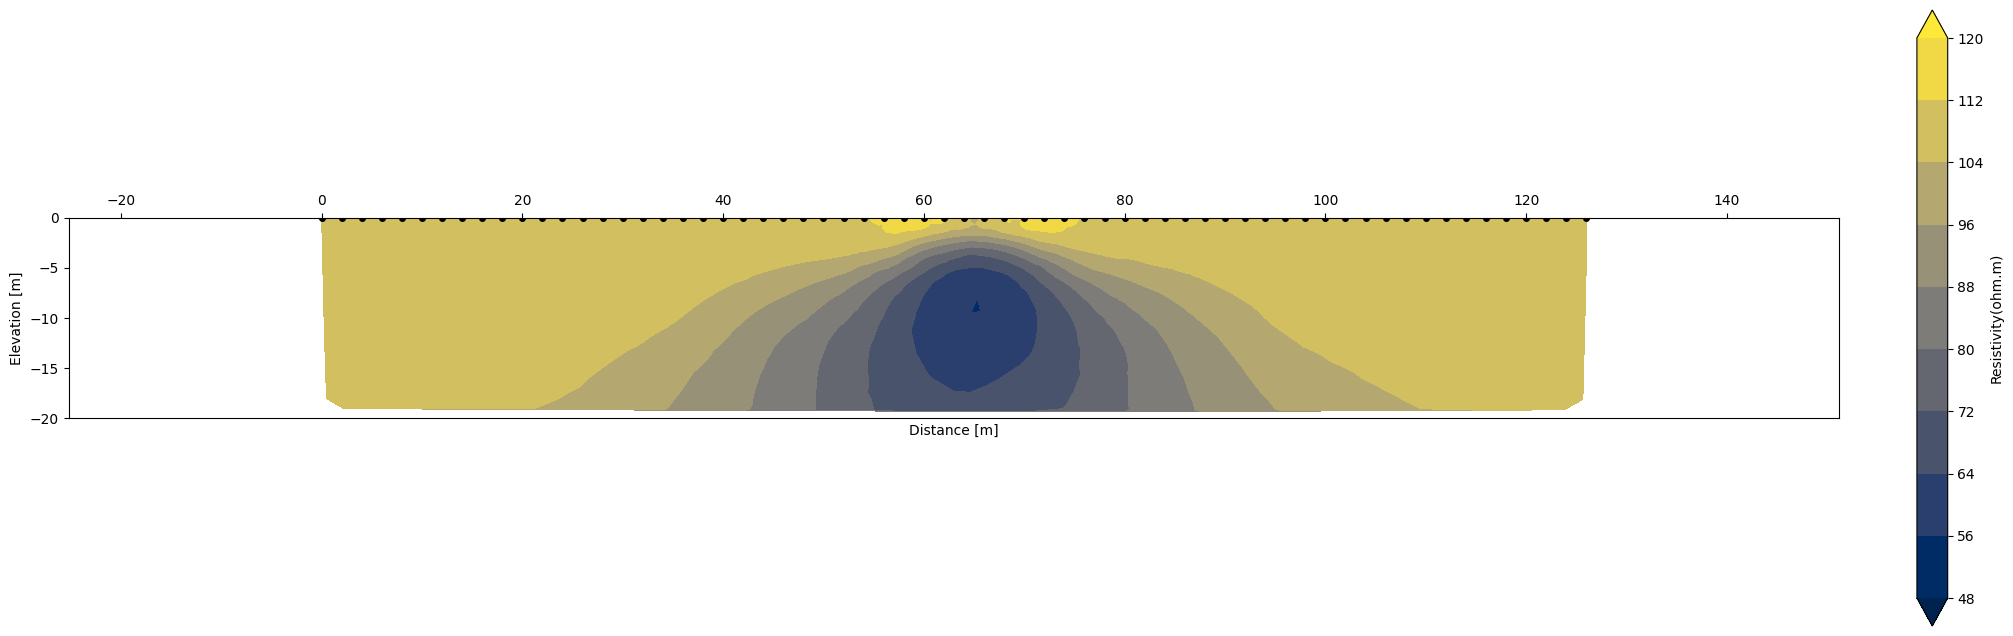

In [22]:
k.showResults(index=1, attr='Resistivity(ohm.m)', color_map='cividis', sens=False, contour=True, clipCorners=False)

# Q5: Include a copy of the two plots from the Modeling Results section. How do they compare and what might explain any differences?

---

## Change array

Now, let's see if our model changes at all if we use a different array. 

Set ERTArray equal to 'dpdp2' (i.e., Dipole-Dipole2 array)

The available arrays are:
| "Friendly" Name | Name in Resipy|
|-----------------|---------------|
| 'Dipole-Dipole1'| 'dpdp1'     |
| 'Dipole-Dipole2'| 'dpdp2'     |
| 'Wenner (alpha)'|'wenner_alpha'|
| 'Wenner (beta)' |'wenner_beta'|
| 'Wenner (gamma)'|'wenner_gamma'|
|'Schlumberger 1' |'schlum1'|
|'Schlumberger2'  |'schlum2'|
|'Multi-Gradient' |'multigrad'|
|'Custom Sequence'|'custSeq'|


> Note that we are not changing any other parameters aside from the array type.

In [23]:
ERTArray = 'dpdp2'

Now, use the cell below to run a forward model and plot the pseudosection

Creating triangular mesh...done (4540 elements)
1825 quadrupoles generated.
Writing .in file and mesh.dat... done
Writing protocol.dat... done
Running forward model... 

 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 19 - 03 - 2025
 >> My beautiful survey                                                             
 >> F o r w a r d   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from resistivity.dat               

 Measurements read:  1825     Measurements rejected:     0

 >> Total Memory required is:          0.002 Gb


All ok


filterData: 0 / 1825 quadrupoles removed.


/home/codespace/.python/current/lib/python3.12/site-packages/numpy/lib/function_base.py:2458: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = asanyarray(outputs, dtype=otypes[0])


0/1825 reciprocal measurements found.
Forward modelling done.

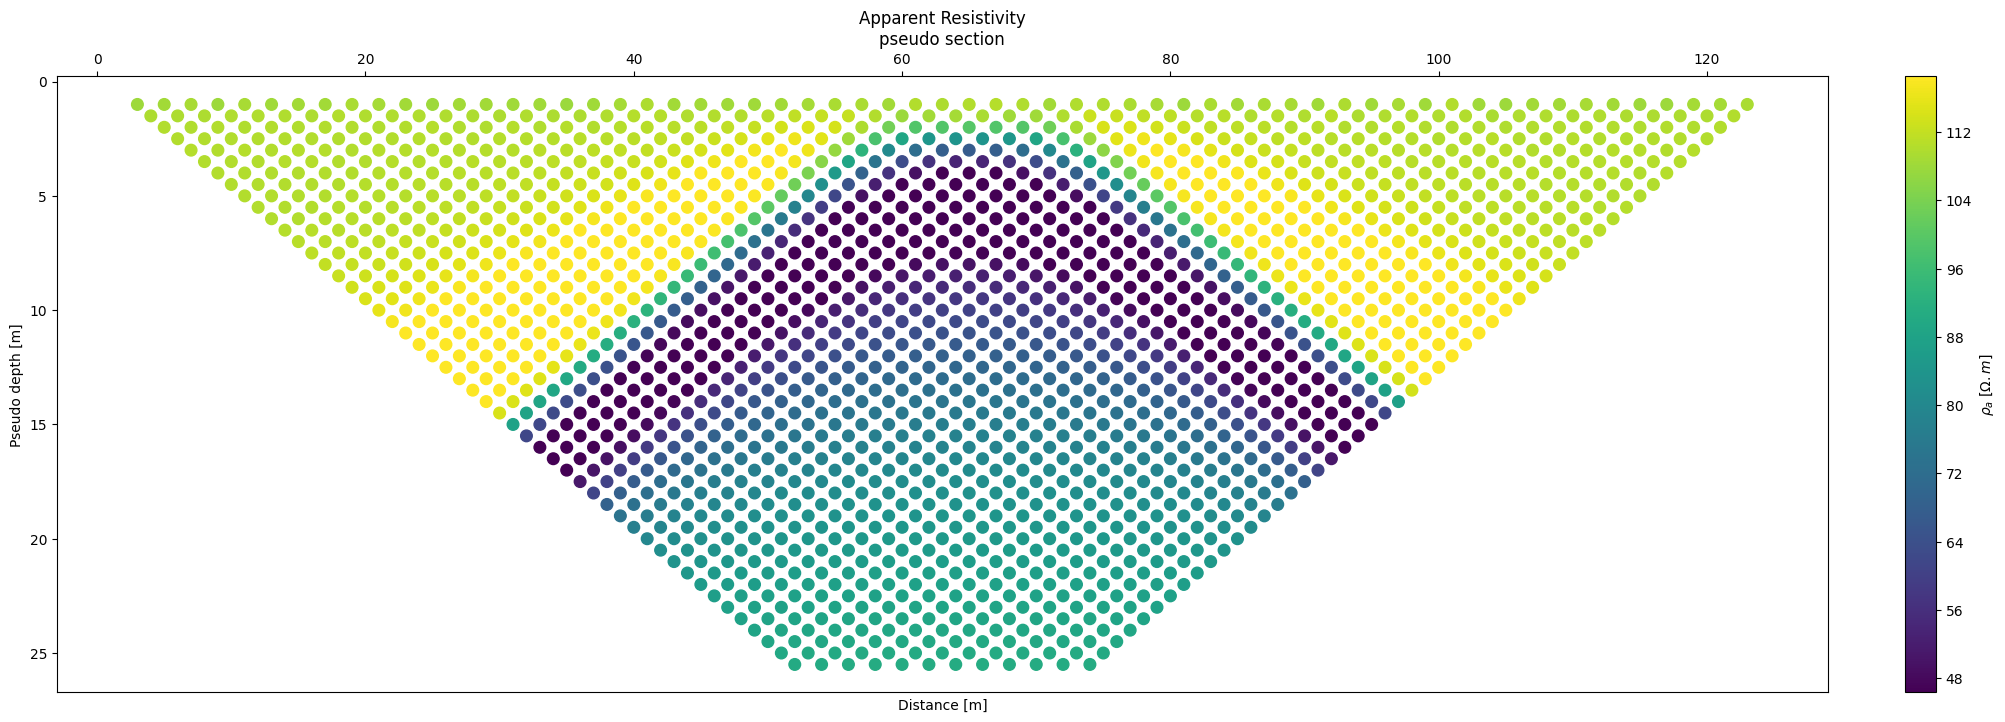

In [24]:
generateSurfaceElectrodes(k, electrodeSpacing, numberOfElectrodes)
k.createMesh(typ='trian', cl_factor = 10, res0=backgroundResistivity) # let's create the mesh based on these electrodes position
k.addRegion(np.array([[leftSideOfObject,topDepthofObject],[rightSideofObject,topDepthofObject],[rightSideofObject,bottomDepthofObject],[leftSideOfObject,bottomDepthofObject],[leftSideOfObject,topDepthofObject]]), targetResistivity)

if ERTArray in ['dpdp1', 'dpdp2', 'schlum1','schlum2']:
  k.createSequence([(ERTArray, 1, dataLevels)])
else:
  wennerList = []
  for w in range(1,dataLevels):
    wennerList.append((ERTArray,w))
  k.createSequence(wennerList)

k.forward(iplot=True) 

And run an inversion using the new array.

Writing .in file and protocol.dat... All non fixed parameters reset to 100 Ohm.m and 0 mrad, as the survey to be inverted is from a forward model.
done

--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 19 - 03 - 2025
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:  1825     Measurements rejected:     0
   Geometric mean of apparent r

All ok


1/1 results parsed (1 ok; 0 failed)


/home/codespace/.python/current/lib/python3.12/site-packages/resipy/meshTools.py:1480: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for col in cont.collections:
/home/codespace/.python/current/lib/python3.12/site-packages/resipy/Project.py:4812: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  colls = mesh.cax.collections if contour == True else [mesh.cax]


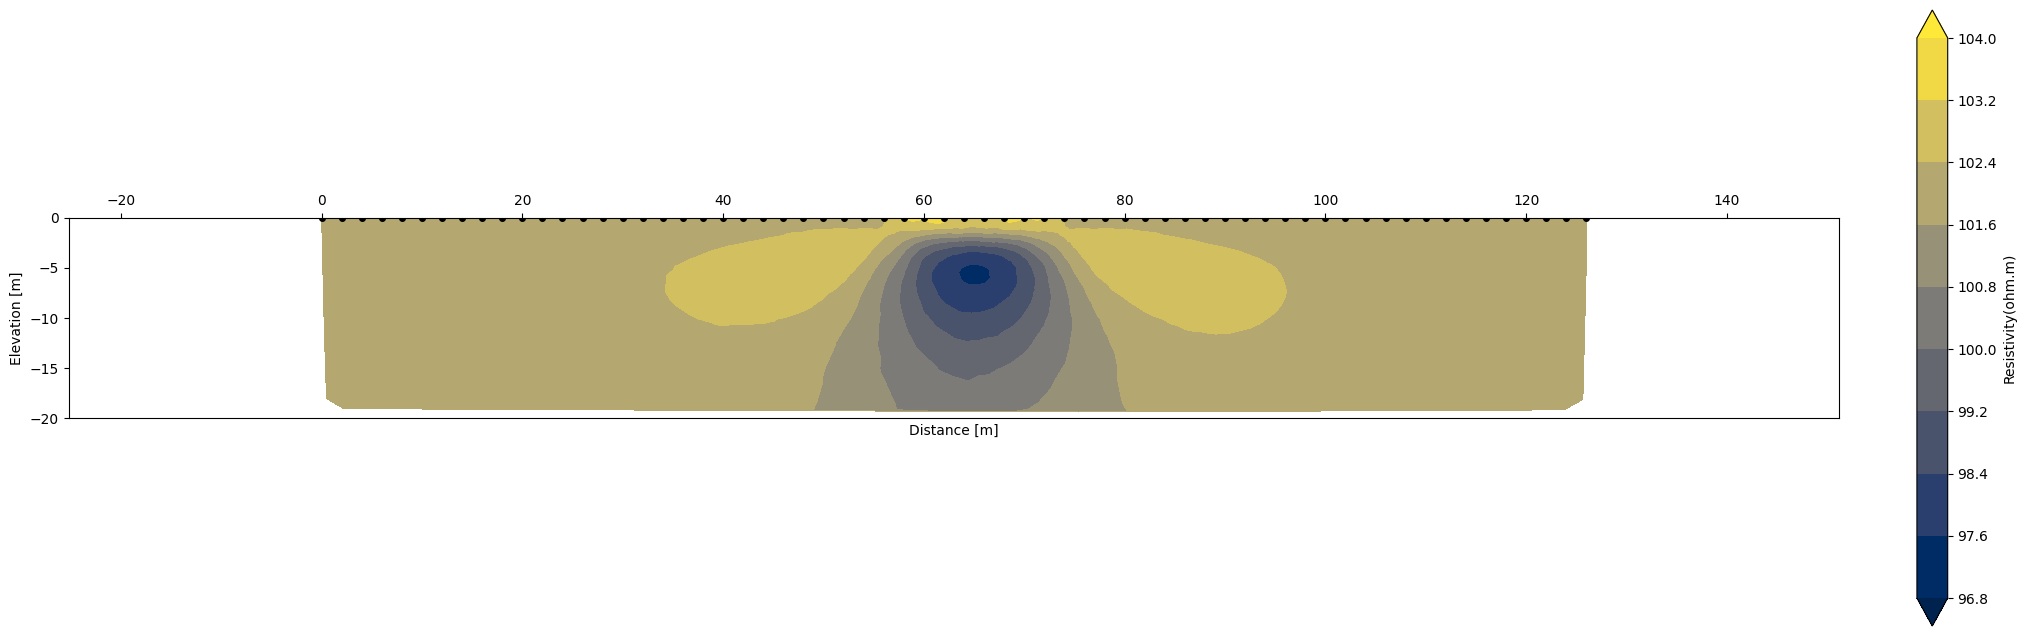

In [25]:
k.invert()
k.showResults(index=1, attr='Resistivity(ohm.m)', color_map='cividis', sens=False, contour=True, clipCorners=False)

# Q6: In 1-4 sentences, comment on the differences and/or similarities between the pseudosections and the inversions between the two model runs we have done now (the first using a Schlumberger array and the second using a dipole-dipole array). 

Which do you like better? Which has a better misfit between the pseudosection and forward model?

> Note that in field situations, often the dipole-dipole array can measure 4-8x as fast as the Schlumberger array. Does this change your answer to Q6?

---

## Add layer

Now, create a geologic layer with the following parameters:


*   Top Depth: -5
*   Bottom Depth: -10
*   Left: 0
*   Right: 75
*   Resistivity: 200



Creating triangular mesh...done (6240 elements)


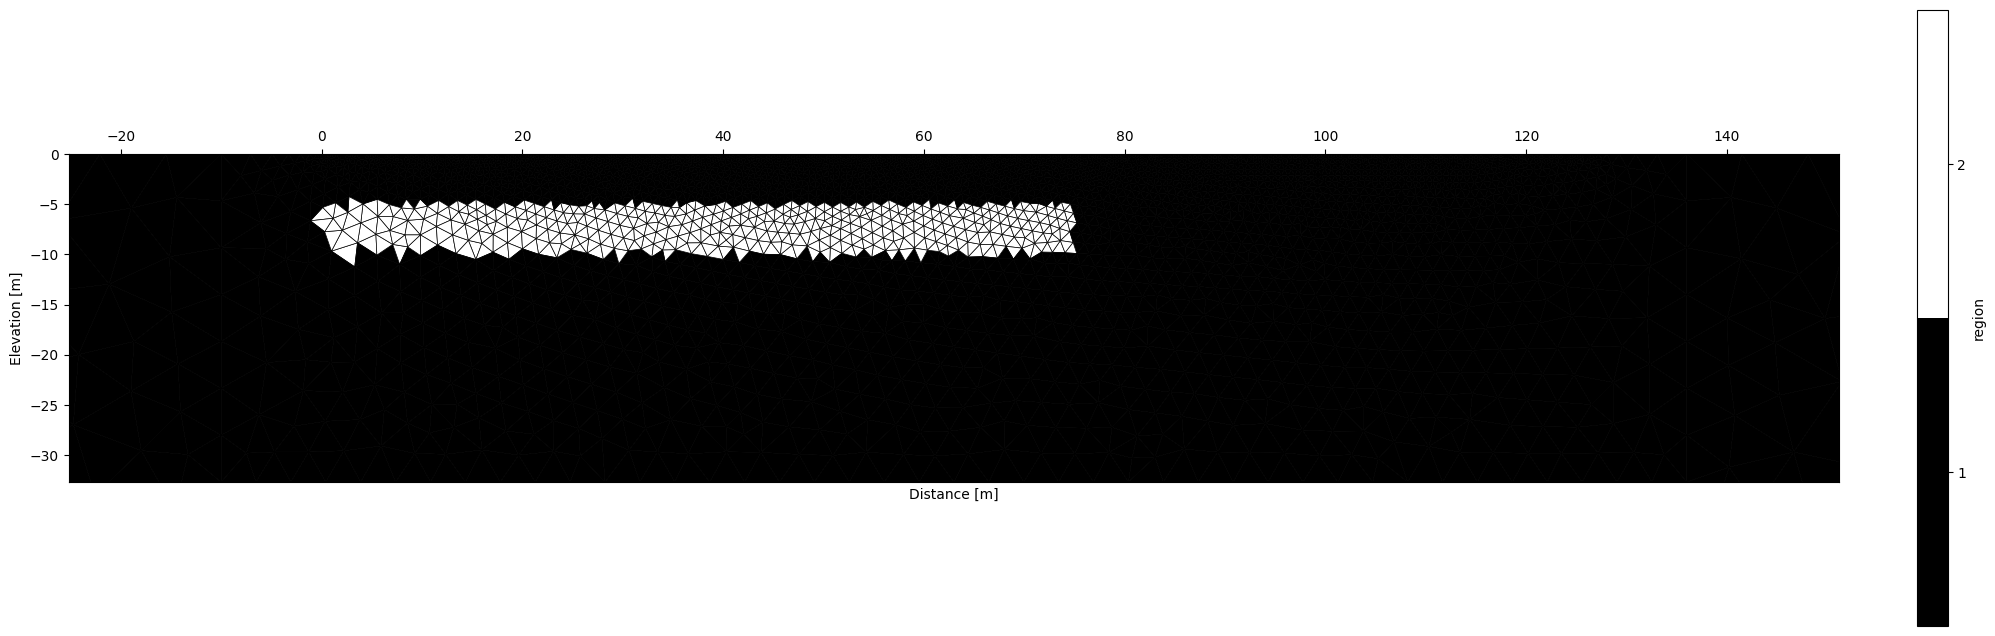

In [26]:
topDepthofObject = -5
bottomDepthofObject = -10
leftSideOfObject = 0
rightSideofObject = 75
targetResistivity = 200

generateSurfaceElectrodes(k, electrodeSpacing,numberOfElectrodes)
k.createMesh(typ='trian', cl_factor = 10, res0=backgroundResistivity) # let's create the mesh based on these electrodes position
k.addRegion(np.array([[leftSideOfObject,topDepthofObject],[rightSideofObject,topDepthofObject],[rightSideofObject,bottomDepthofObject],[leftSideOfObject,bottomDepthofObject],[leftSideOfObject,topDepthofObject]]), targetResistivity)
k.showMesh()

Writing .in file and mesh.dat... done
Writing protocol.dat... done
Running forward model... 

 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 19 - 03 - 2025
 >> My beautiful survey                                                             
 >> F o r w a r d   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from resistivity.dat               

 Measurements read:  1825     Measurements rejected:     0

 >> Total Memory required is:          0.002 Gb


All ok
/home/codespace/.python/current/lib/python3.12/site-packages/numpy/lib/function_base.py:2458: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = asanyarray(outputs, dtype=otypes[0])


filterData: 0 / 1825 quadrupoles removed.
0/1825 reciprocal measurements found.
Forward modelling done.

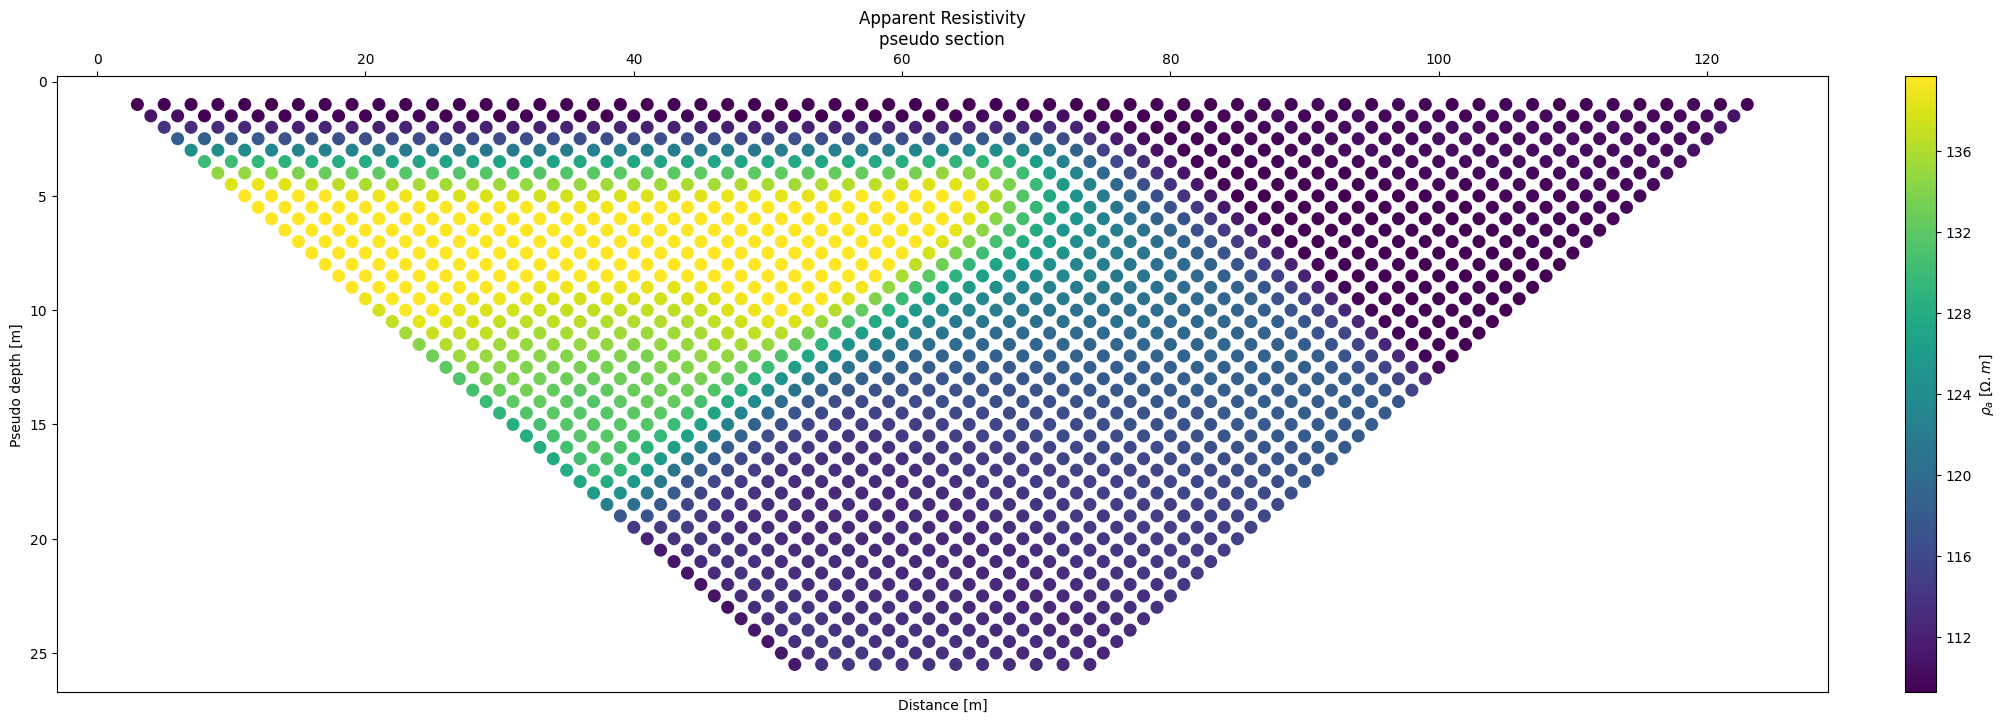

In [27]:
k.forward(noise=measrument_error_pct,iplot=True) 

Writing .in file and protocol.dat... All non fixed parameters reset to 100 Ohm.m and 0 mrad, as the survey to be inverted is from a forward model.
done

--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 19 - 03 - 2025
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:  1825     Measurements rejected:     0
   Geometric mean of apparent r

All ok
/home/codespace/.python/current/lib/python3.12/site-packages/resipy/meshTools.py:1480: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for col in cont.collections:
/home/codespace/.python/current/lib/python3.12/site-packages/resipy/Project.py:4812: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  colls = mesh.cax.collections if contour == True else [mesh.cax]


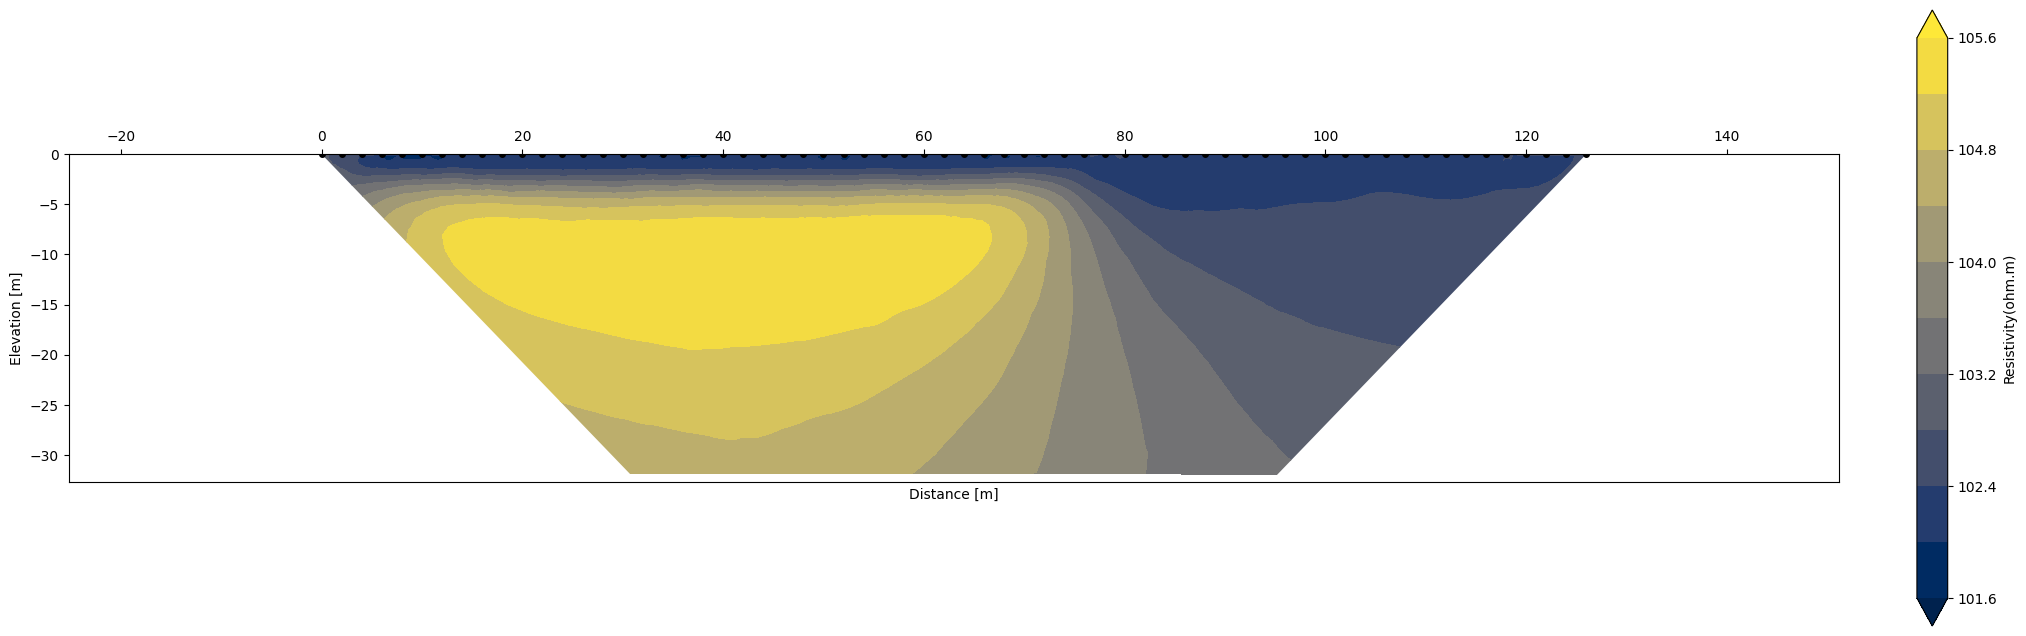

In [28]:
k.invert()
k.showResults(index=1, attr='Resistivity(ohm.m)', color_map='cividis', sens=False, contour=True, clipCorners=True)

# Q7: The forward model and inversion above represent a layered subsurface. Describe what your output is and how this compares with the first model we processed. 

> Note that using the default inversion parameters as we did in this section of the exercise may not yield highly targeted results for this or other ERT data (also, using a more sophisticated software like Res2DInv might yield better inversions).

## Add downhole electrodes

First, let's regenerate our dataframe with the surface electrodes

In [29]:
generateSurfaceElectrodes(k, electrodeSpacing, numberOfElectrodes)
k.elec

,x,y,z,remote,buried,label
0,0.0,0.0,0.0,False,False,1
1,2.0,0.0,0.0,False,False,2
2,4.0,0.0,0.0,False,False,3
3,6.0,0.0,0.0,False,False,4
4,8.0,0.0,0.0,False,False,5
...,...,...,...,...,...,...
59,118.0,0.0,0.0,False,False,60
60,120.0,0.0,0.0,False,False,61
61,122.0,0.0,0.0,False,False,62
62,124.0,0.0,0.0,False,False,63


Now, let's add our downhole electrodes (these are electrodes that would be put in a screened, pvc well)

In [51]:
generateSurfaceElectrodes(k, electrodeSpacing, numberOfElectrodes) #Just in case, to make sure we are starting with the rightSideofObject electrodes

newElecDF = k.elec.copy()

for x in [33, 63]:
  depth = -4 # We do not start at 0, since downhole electrodes need to be in water
  for i in range(64, 96):
    itemList = []
    itemList.append(x) #X-location of downhole electrode
    itemList.append(0.0) #Y location
    itemList.append(depth) #z location/Depth of downhole electrode
    itemList.append(False) # Not a remote electrode (used only in pole arrays)
    itemList.append(True) # It is a a buried electrode
    itemList.append(i+1) #Add electrodeLabel
    itemDF = pd.DataFrame(itemList).transpose() #Turn list into dataframe for appending
    depth -= 5 # Increment the depth so next electrode is 5 meters deeper
    itemDF.columns=['x','y','z','remote','buried','label'] # add column names
    itemDF.index=[i] #add index value
    
    if i < 75:
      newElecDF = pd.concat([newElecDF, itemDF]) # Add downhole electrodes to existing electrode dataframe
      
k.setElec(newElecDF) #Set new electrode layout using new dataframe
k.elec

,x,y,z,remote,buried,label
0,0.0,0.0,0.0,False,False,1
1,2.0,0.0,0.0,False,False,2
2,4.0,0.0,0.0,False,False,3
3,6.0,0.0,0.0,False,False,4
4,8.0,0.0,0.0,False,False,5
...,...,...,...,...,...,...
70,63.0,0.0,-34.0,False,True,71
71,63.0,0.0,-39.0,False,True,72
72,63.0,0.0,-44.0,False,True,73
73,63.0,0.0,-49.0,False,True,74


In [ ]:
k.createMesh(typ='trian', cl_factor=2, res0=backgroundResistivity) # let's create the mesh based on these electrodes position
k.addRegion(np.array([[leftSideOfObject,topDepthofObject],[rightSideofObject,topDepthofObject],[rightSideofObject,bottomDepthofObject],[leftSideOfObject,bottomDepthofObject],[leftSideOfObject,topDepthofObject]]), targetResistivity)
k.showMesh()

Creating triangular mesh...

In [50]:
k.forward(noise=measrument_error_pct, iplot=True)

Writing .in file and mesh.dat... done
Writing protocol.dat... done
Running forward model... 

 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 19 - 03 - 2025
 >> My beautiful survey                                                             
 >> F o r w a r d   S o l u t i o n   S e l e c t e d <<
 FATAL:       2 duplicate nodes found in mesh.dat


FATAL error


FileNotFoundError: /home/codespace/.python/current/lib/python3.12/site-packages/resipy/invdir/fwd/R2_forward.dat not found.

In [ ]:
k.invert()
k.showResults(index=1, attr='Resistivity(ohm.m)', color_map='cividis', sens=False, contour=True, clipCorners=True)

# Q8: Describe the differences between the inverted layered model before and after we added downhole electrodes. 

# Q9: What is the biggest insight you took away from this exercise?